# Oversampled & PCA - Project Arrhythmia

## Import Essential Libraries
**Functionality:** Imports core packages for data manipulation, scientific computing, visualization, and machine learning.

In [ ]:
#importing essential libraries
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

## Load CSV Data
**Functionality:** Loads the arrhythmia dataset from CSV file into a pandas DataFrame.

In [ ]:
#Data Loading
df=pd.read_csv("Data/arrhythmia.csv", header=None)

## Preview First Rows
**Functionality:** Displays the first few rows of the dataset to understand data structure.

In [ ]:
#Viewing first 5 rows of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


## Preview Last Rows
**Functionality:** Shows the last few rows of the dataset to check data consistency.

In [ ]:
#Inspecting last 5 rows of the dataset
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


## Dataset Dimensions
**Functionality:** Returns the dimensions (rows, columns) of the dataset.

In [ ]:
#Inspecting the dimensionality of the dataset
df.shape

(452, 280)

## Dataset Info
**Functionality:** Provides information about data types, non-null counts, and memory usage.

In [ ]:
#Obtaining information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


## Descriptive Statistics
**Functionality:** Generates statistical summary including mean, std, min, max, and quartiles.

In [ ]:
#Obtaining brief description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,452.0,46.471239,16.466631,0.0,36.00,47.00,58.000,83.0
1,452.0,0.550885,0.497955,0.0,0.00,1.00,1.000,1.0
2,452.0,166.188053,37.170340,105.0,160.00,164.00,170.000,780.0
3,452.0,68.170354,16.590803,6.0,59.00,68.00,79.000,176.0
4,452.0,88.920354,15.364394,55.0,80.00,86.00,94.000,188.0
...,...,...,...,...,...,...,...,...
275,452.0,0.514823,0.347531,-0.8,0.40,0.50,0.700,2.4
276,452.0,1.222345,1.426052,-6.0,0.50,1.35,2.100,6.0
277,452.0,19.326106,13.503922,-44.2,11.45,18.10,25.825,88.8
278,452.0,29.473230,18.493927,-38.6,17.55,27.90,41.125,115.9


## Count Missing Values
**Functionality:** Counts the number of missing (null) values in the dataset.

In [ ]:
#Counting total number of null values
pd.isnull(df).sum().sum()

np.int64(0)

## Replace Missing Markers
**Functionality:** Converts '?' placeholders to NaN for proper missing value handling.

In [ ]:
#Replacing "?" with np.nan value
df=df.replace('?', np.nan)

## Count Missing Values
**Functionality:** Re-counts missing values after replacing '?' with NaN.

In [ ]:
#Final counting total number of null values in dataset
nu = pd.isnull(df).sum().sum()
nu

np.int64(408)

## Visualize Missing Data
**Functionality:** Creates visualization of missing value distribution across columns.

Text(0, 0.5, 'Total number of null value in each column')

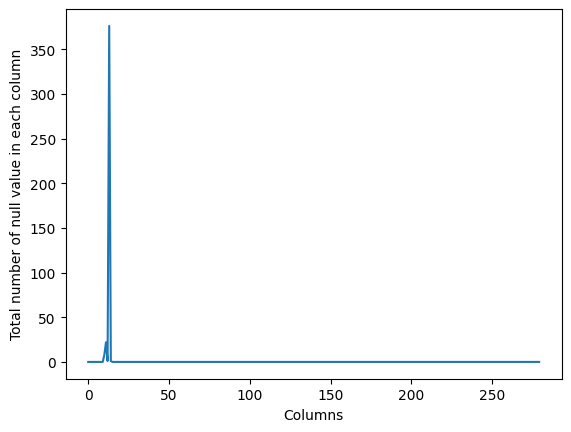

In [ ]:
#Visualizing the distribution of the missing data
pd.isnull(df).sum().plot()
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

## Visualize Missing Data
**Functionality:** Zooms into columns 7–17 to inspect missing-data patterns using a bar chart.

Text(0, 0.5, 'Total number of null value in each column')

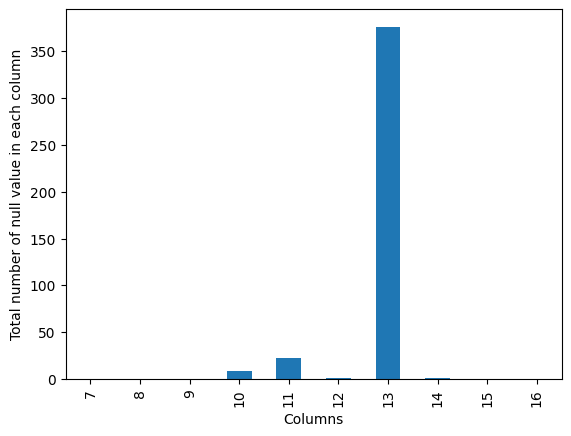

In [ ]:
# Zooming into the visulaized data (as bar graph)
pd.isnull(df).sum()[7:17].plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

## Drop Column
**Functionality:** Removes a column with excessive missing values from the dataset.

In [ ]:
#Dropping column 13 as it has too many null values
df.drop(columns=13, inplace = True)

## Copy DataFrame
**Functionality:** Creates a copy of the dataframe for safe preprocessing operations.

In [ ]:
#Using The mean strategy for imputation
#making a copy of the dataframe to avoid changes to the original file from imputing

new_df = df.copy()

## Flag Columns to Impute
**Functionality:** Adds boolean indicators to new_df showing where each future imputation will occur.

In [ ]:
#Making new columns indicating what will be imputed

cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col]=new_df[col].isnull()

## Impute Missing Values
**Functionality:** Fills missing values using SimpleImputer with mean strategy.

In [ ]:
#imputation
# my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

my_imputer=SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

## Preview First Rows
**Functionality:** Displays the first few rows of the dataset to understand data

In [ ]:
#imputed dataframe
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


## Count Missing Values
**Functionality:** Counts the number of missing (null) values in the dataset.

In [ ]:
#Dataset with zero null values
pd.isnull(new_df).sum().sum()

np.int64(0)

## Define Column Names
**Functionality:** Creates comprehensive list of descriptive column names for all features.

In [ ]:
#Creating column names
final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom",
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

## Assign Column Names
**Functionality:** Assigns meaningful column names to the dataset features.

In [ ]:
#Adding column names to dataset

new_df.columns=final_df_columns
new_df.to_csv('new data with target class.csv')
new_df.head()

## Separate Target Variable
**Functionality:** Extracts the class column as target and prepares final features.

In [ ]:
target=new_df["class"]
final_df = new_df.drop(columns='class')

## Dataset Dimensions
**Functionality:** Returns the dimensions (rows, columns) of final_df.

In [ ]:
final_df.shape

(452, 278)

## Define Class Labels
**Functionality:** Creates list mapping numeric class labels to arrhythmia condition names.

In [ ]:
#List with class names

class_names=["Normal",
               "Ischemic changes (CAD)",
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy",
               "Sinus bradycardy",
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

## Sort Data by Class
**Functionality:** Orders the dataset by target class for analysis.

In [ ]:
t = new_df.sort_values(by=['class'])

## Count Class Instances
**Functionality:** Counts the number of instances for each class in the dataset.

In [ ]:
#Counting the number of instances for each class
la = t['class'].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

## Plot Class Distribution
**Functionality:** Visualizes the distribution of classes using count plot.

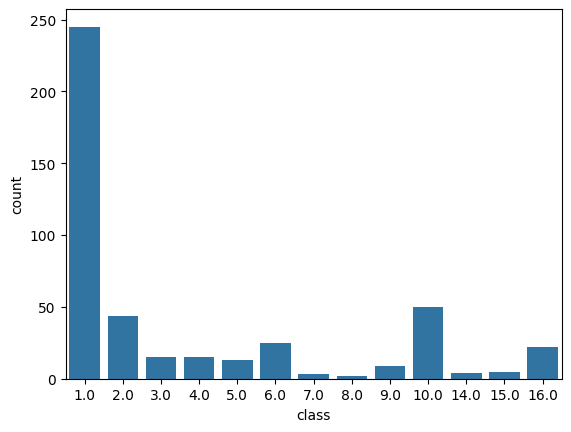

In [ ]:
sns.countplot(x='class',data=new_df)
plt.show()

## Execute Code
**Functionality:** Builds values list for plotting purposes.

In [ ]:
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


## Create Pie Chart
**Functionality:** Generates pie chart of class distribution with log scaling.

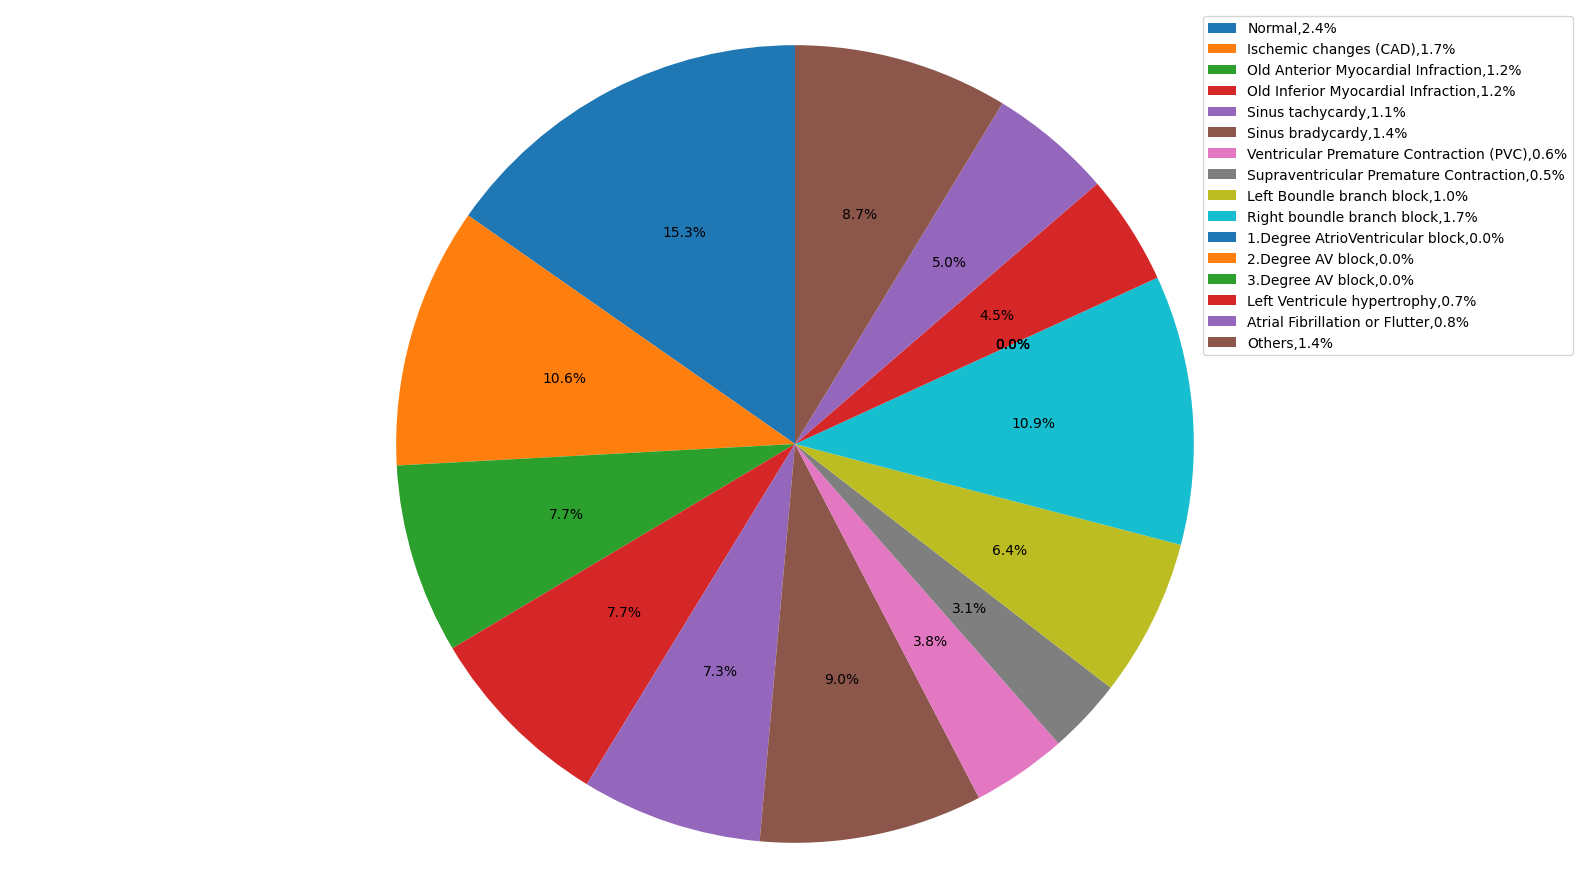

In [ ]:
labels = class_names
Log_Norm=[]
for i in values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct="%1.1f%%", startangle=90)
leg=plt.legend(loc='best',labels=['%s,%1.1f%%'%(l,s) for l,s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color='Black')
plt.tight_layout()
plt.show()

## PairGrid Demographic Analysis
**Functionality:** Creates pairwise scatter plots to examine relationships and outliers in demographic features.

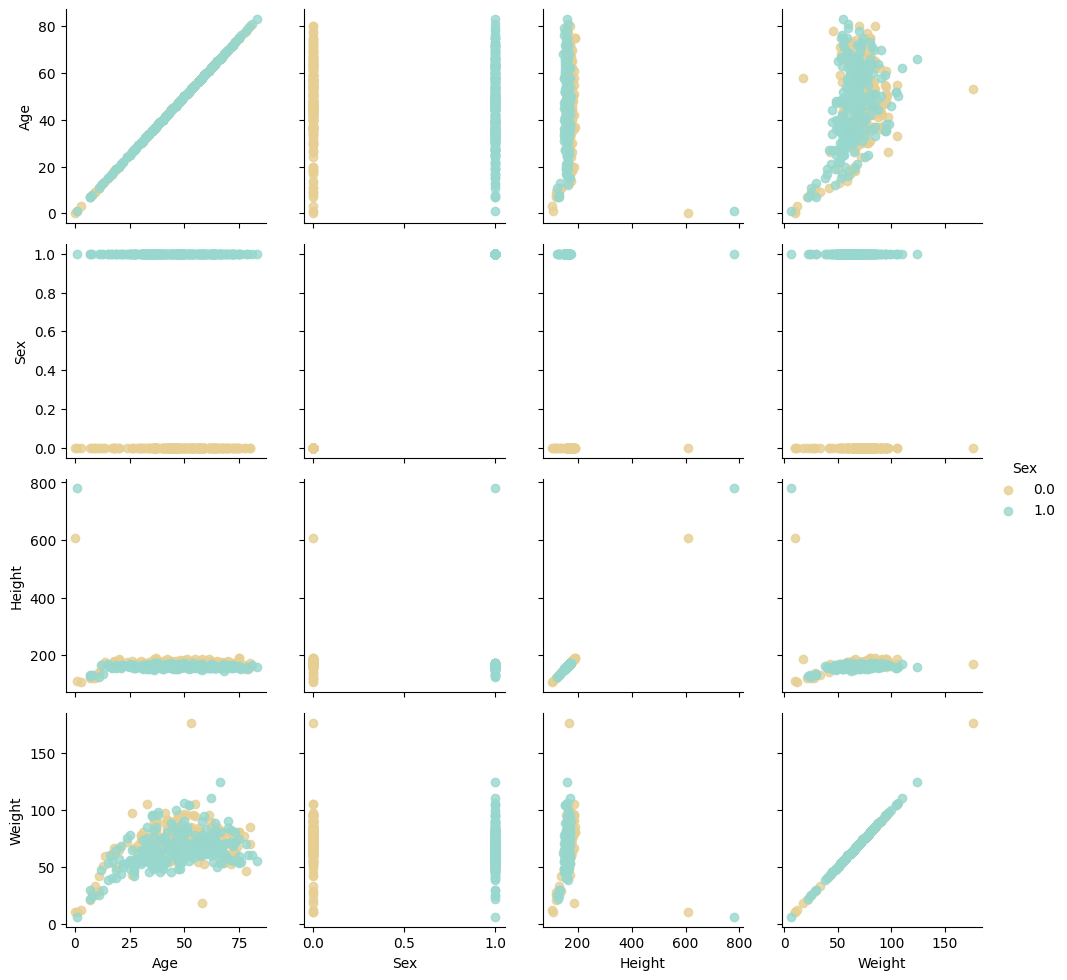

In [ ]:
#looking for pairwise relationship and outliers
g=sns.PairGrid(final_df, vars=['Age','Sex','Height','Weight'], hue='Sex',palette='BrBG')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

## Display Extreme Values
**Functionality:** Shows the highest/lowest values in a feature to identify potential outliers.

In [ ]:
sorted(final_df["Height"], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

## Boxplot of Interval Features
**Functionality:** Visualizes distributions of ECG interval measurements to detect

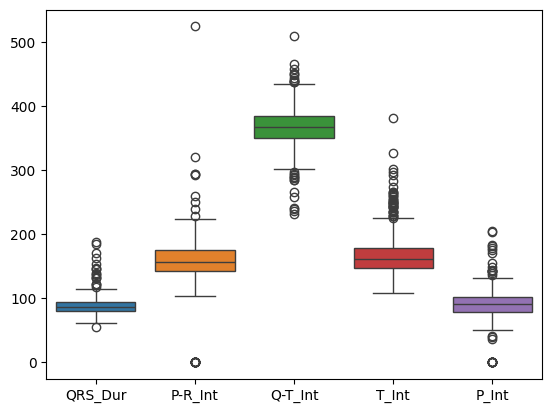

In [ ]:
sns.boxplot(data=final_df[['QRS_Dur','P-R_Int','Q-T_Int','T_Int','P_Int']]);

## Bar Chart of Lower Range Values
**Functionality:** Plots frequency distribution of lower range values in the feature.

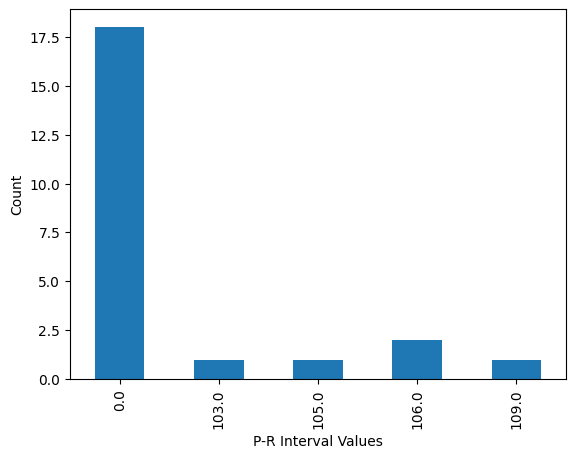

In [ ]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

## Bar Chart of Upper Range Values
**Functionality:** Plots frequency distribution of upper range values in the feature.

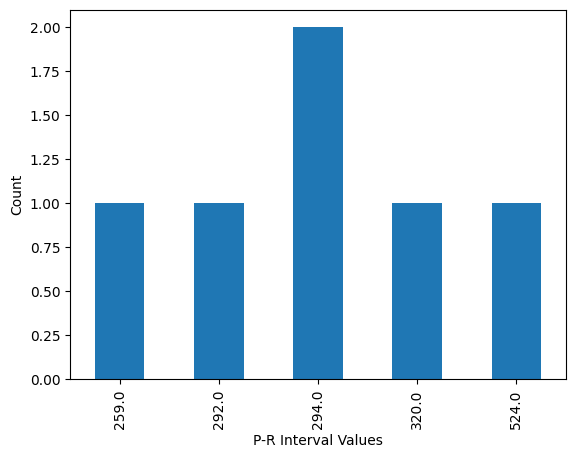

In [ ]:
final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

## Boxplot of Wave Features
**Functionality:** Shows boxplots for ECG wave characteristics and heart rate

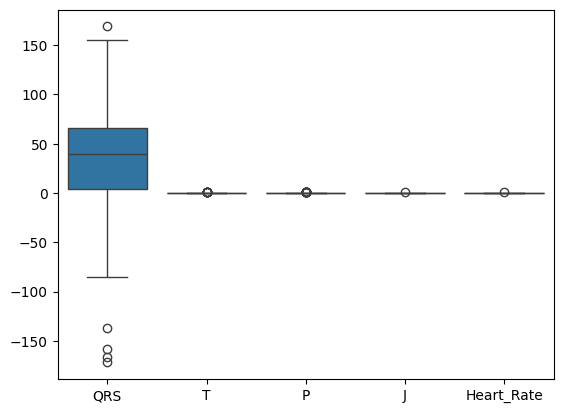

In [ ]:
sns.boxplot(data=final_df[['QRS','T','P','J',"Heart_Rate"]]);

## Boxplot of Wave Features
**Functionality:** Shows boxplots for R′, S′, Integral Deflection and Rag R Nom to detect anomalies.

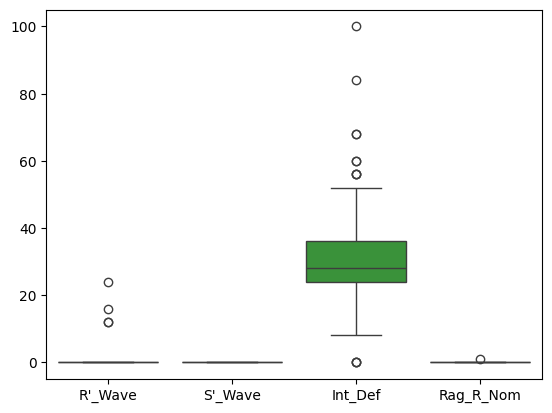

In [ ]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);

## Frequency Analysis
**Functionality:** Counts and sorts unique values to analyze distribution of S′Wave.

In [ ]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

,count
S'_Wave,
0.0,452


## Frequency Analysis
**Functionality:** Counts and sorts unique values to analyze distribution of V101.

In [ ]:
final_df["V101"].value_counts().sort_index(ascending=False)

,count
V101,
216.0,1
112.0,1
84.0,1
72.0,1
68.0,1
64.0,1
48.0,6
44.0,6
40.0,13


## Frequency Analysis
**Functionality:** Counts and sorts unique values to analyze distribution of V201.

In [ ]:
final_df["V201"].value_counts().sort_index(ascending=False)

,count
V201,
216.0,1
136.0,1
84.0,1
72.0,1
60.0,5
56.0,4
52.0,12
48.0,19
44.0,53


## Frequency Analysis
**Functionality:** Counts and sorts unique values to analyze distribution of V301.

In [ ]:
final_df["V301"].value_counts().sort_index(ascending=False)

,count
V301,
132.0,1
88.0,2
76.0,2
72.0,1
68.0,2
64.0,3
60.0,16
56.0,26
52.0,57


## Frequency Analysis
**Functionality:** Counts and sorts unique values to analyze distribution of V501.

In [ ]:
final_df["V501"].value_counts().sort_index(ascending=False)

,count
V501,
136.0,1
120.0,2
116.0,1
108.0,1
96.0,1
92.0,1
84.0,1
76.0,2
72.0,3


## Boxplot of AVR Series
**Functionality:** Displays distributions for AVR voltage series features to inspect anomalies.

<Axes: >

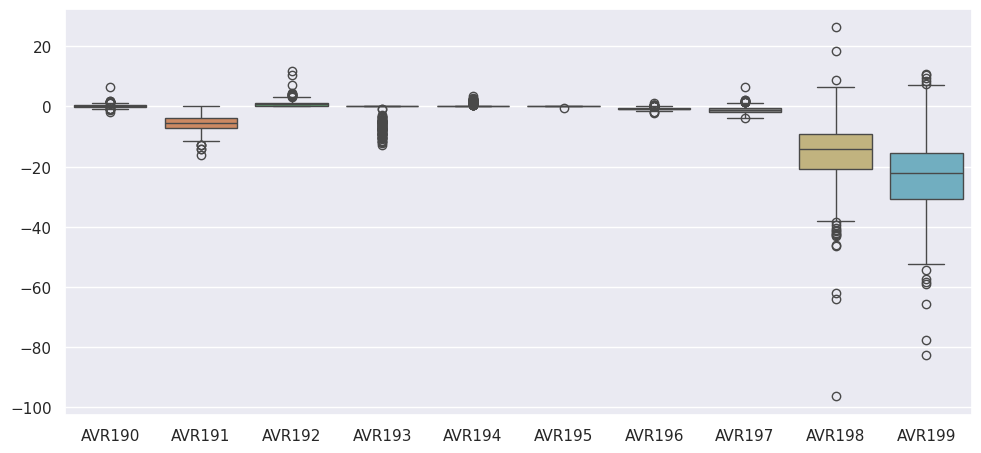

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194",
                           "AVR195","AVR196","AVR197","AVR198","AVR199",]])

## Boxplot of AVL Series
**Functionality:** Shows boxplots for AVL voltage series features to detect outliers.

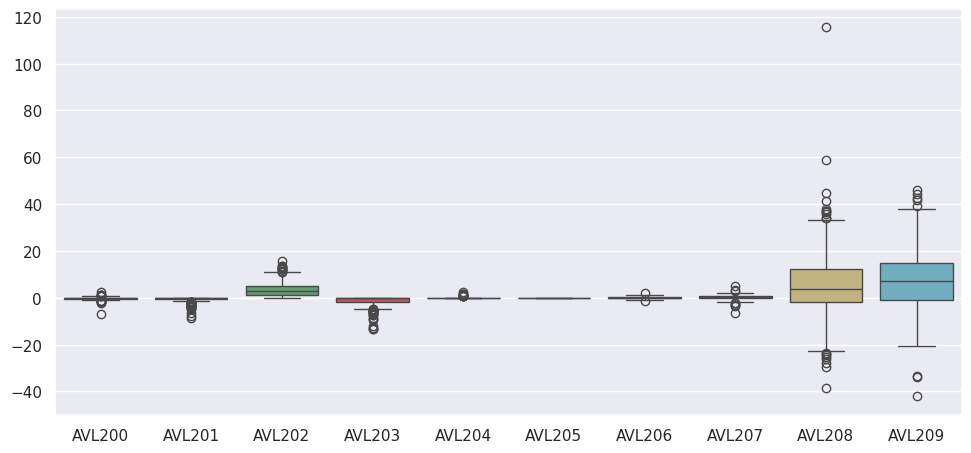

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[['AVL200','AVL201','AVL202','AVL203','AVL204','AVL205','AVL206',
                           'AVL207','AVL208','AVL209']]);

## Boxplot of AVF Series
**Functionality:** Visualizes distributions for AVF voltage series features.

<Axes: >

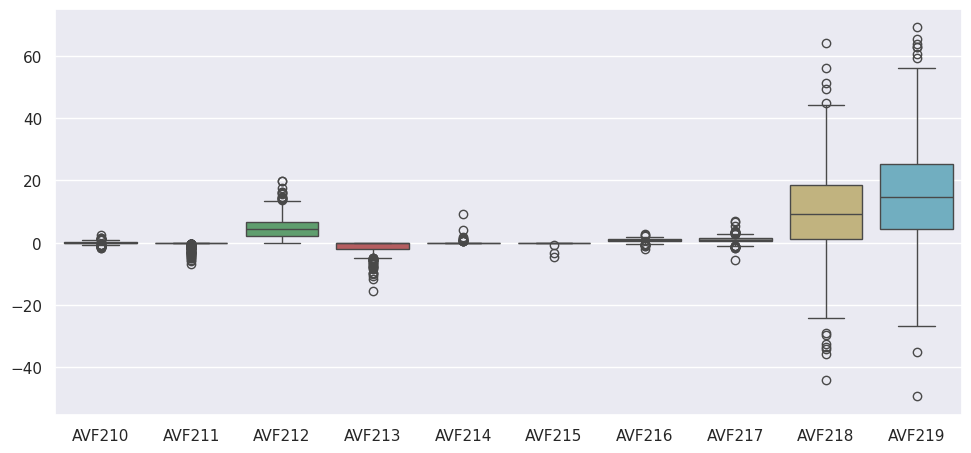

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[['AVF210','AVF211','AVF212','AVF213','AVF214','AVF215','AVF216',
                           'AVF217','AVF218','AVF219',]])

## Calculate Feature Correlations
**Functionality:** Computes Pearson correlation between features and target variable.

In [ ]:
#Finding correlation with target feature using pearson correlation

target = new_df['class']
pearsoncorr = new_df.corrwith(other = target, method='pearson')
pearsoncorr.values

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([-9.23812218e-02, -1.78080037e-01,  6.64802711e-03, -9.01507390e-02,
        3.23878728e-01, -9.99540161e-02,  2.83049762e-02,  9.76253981e-02,
       -1.22002504e-01,  1.95854526e-02, -1.68648870e-04,  1.90644217e-01,
       -3.08114850e-02,  3.33672764e-02,  3.96491896e-03,  4.26738126e-02,
        1.95198200e-01,  6.39992472e-02,             nan,  4.27635327e-02,
       -2.01150248e-02,  7.67517615e-03, -3.55694451e-02,  3.20969797e-02,
        3.20969797e-02,  8.30559434e-02, -3.61168680e-03,  4.83674292e-02,
        1.83082712e-01, -1.05049431e-02,  6.65428889e-02,  6.77662940e-02,
        4.17574601e-02,  7.98435069e-02, -2.01150248e-02,  1.69531020e-02,
       -3.60504699e-02, -6.66334979e-04, -2.36687153e-02,  1.16515578e-01,
        8.16735582e-02,  1.44307782e-02, -3.20137575e-02,  8.34076694e-02,
       -3.08114850e-02,  5.14341059e-02, -3.08114850e-02, -8.40208668e-02,
       -1.15446555e-02, -5.76271452e-03,  2.10381327e-02,  1.73243101e-01,
        2.54790200e-03,  

## Split Dataset
**Functionality:** Splits the dataset into training (80%) and testing (20%) subsets for model evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.2, random_state=1)

## Apply Standard Scaling
**Functionality:** Fits StandardScaler and transforms training and test sets.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Suppress Warnings
**Functionality:** Suppresses Python warnings for cleaner output.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Import Evaluation Metrics
**Functionality:** Imports accuracy, recall, precision, and confusion matrix metrics for model evaluation.

In [ ]:
#importing evaluation metrics

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score,recall_score,precision_score,confusion_matrix

## Initialize Results Storage
**Functionality:** Creates DataFrame to store and compare model performance metrics across different algorithms.

In [ ]:
#Will store result of each model
result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

## Train KNN Classifier
**Functionality:** Trains K-Nearest Neighbors algorithm on the dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train,y_train)
y_pred = knnclassifier.predict(X_test)

## Record KNN Performance
**Functionality:** Calculates KNN accuracy scores and updates results DataFrame.

In [ ]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_testaccuracy = accuracy_score(y_test, knnclassifier.predict(X_test))

result = pd.concat([result, pd.DataFrame([{'Model':'KNN Classifier','Train Accuracy':knn_train_accuracy,'Test Accuracy':knn_testaccuracy}])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.65097,0.648352


## Train Logistic Regression
**Functionality:** Trains logistic regression classifier with saga solver.

In [ ]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(solver = 'saga', random_state = 0)
lgclassifier.fit(X_train, y_train)
y_pred = lgclassifier.predict(X_test)

## Record Logistic Regression Performance
**Functionality:** Calculates logistic regression accuracy and recall scores.

In [ ]:
lg_train_recall = recall_score(y_train, lgclassifier.predict(X_train), average='weighted')
lg_train_recall = recall_score(y_test, lgclassifier.predict(X_test), average='weighted')
lg_train_accuracy = accuracy_score(y_train, lgclassifier.predict(X_train))
lg_test_accuracy = accuracy_score(y_test, lgclassifier.predict(X_test))
result = pd.concat([result, pd.DataFrame([{'Model':'Logistic Regression','Train Accuracy':lg_train_accuracy,'Test Accuracy':lg_test_accuracy}])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.650970,0.648352
0,Logistic Regression,0.939058,0.747253


## Train Decision Tree
**Functionality:** Trains decision tree classifier on the dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
dtclassifier.fit(X_train, y_train)
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)

## Record Decision Tree Performance
**Functionality:** Calculates decision tree accuracy scores and updates results.

In [ ]:
dt_train_accuracy = accuracy_score(y_train, y_pred_train)
dt_test_accuracy = accuracy_score(y_test, y_pred_test)
result = pd.concat([result, pd.DataFrame([{'Model':'Decision Tree Classifier','Train Accuracy':dt_train_accuracy,'Test Accuracy':dt_test_accuracy}])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.650970,0.648352
0,Logistic Regression,0.939058,0.747253
0,Decision Tree Classifier,0.789474,0.681319


## Train Linear SVM
**Functionality:** Trains linear Support Vector Machine classifier.

In [ ]:
from sklearn.svm import LinearSVC
lsvclassifier = LinearSVC(C=0.01)
lsvclassifier.fit(X_train, y_train)
y_pred_test = lsvclassifier.predict(X_test)
y_pred_train = lsvclassifier.predict(X_train)

## Record SVM Performance
**Functionality:** Calculates SVM accuracy scores and updates results DataFrame.

In [ ]:
lsvc_train_accuracy_score = accuracy_score(y_train, y_pred_train)
lsvc_test_accuracy_score = accuracy_score(y_test, y_pred_test)

result = pd.concat([result, pd.Series({'Model':'Linear SVC','Train Accuracy':lsvc_train_accuracy_score,'Test Accuracy':lsvc_test_accuracy_score}).to_frame().T],ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.65097,0.648352
1,Logistic Regression,0.939058,0.747253
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022


## Train Kernalized SVM
**Functionality:** Trains Support Vector Machine with sigmoid kernel using specified C and gamma parameters.

In [ ]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid', C=10, gamma=0.001)
KSVC_clf.fit(X_train, y_train)
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

## Record Kernalized SVM Performance
**Functionality:** Calculates kernalized SVM accuracy scores and updates results DataFrame.

In [ ]:
ksvc_train_accuracy_score = accuracy_score(y_train, y_pred_train)
ksvc_test_accuracy_score = accuracy_score(y_test, y_pred_test)

result = pd.concat([result, pd.Series({'Model':'Kernalized SVC','Train Accuracy':ksvc_train_accuracy_score,'Test Accuracy':ksvc_test_accuracy_score}).to_frame().T],ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.65097,0.648352
1,Logistic Regression,0.939058,0.747253
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernalized SVC,0.847645,0.78022


## Train Random Forest
**Functionality:** Trains Random Forest classifier with specified parameters including 300 estimators.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini', max_features=100,
                                max_depth=10, max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=300)

## Record Random Forest Performance
**Functionality:** Calculates Random Forest accuracy scores and updates results DataFrame.

In [ ]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)
rf_train_accuracy_score = accuracy_score(y_train, y_pred_train)
rf_test_accuracy_score = accuracy_score(y_test, y_pred_test)

result = pd.concat([result, pd.Series({'Model':'Random Forest Classifier','Train Accuracy':rf_train_accuracy_score,'Test Accuracy':rf_test_accuracy_score}).to_frame().T],ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.65097,0.648352
1,Logistic Regression,0.939058,0.747253
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernalized SVC,0.847645,0.78022
5,Random Forest Classifier,0.875346,0.758242


## Apply PCA
**Functionality:** Applies Principal Component Analysis retaining 98% of variance and fits on training data.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca.fit(X_train)

pca.n_components_

np.int64(121)

## Transform Data with PCA
**Functionality:** Transforms training and test data using fitted PCA components.

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Import Cross-Validation Tools
**Functionality:** Imports StratifiedKFold and GridSearchCV for hyperparameter tuning.

In [ ]:
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV

## Perform Grid Search with PCA
**Functionality:** Executes grid search cross-validation on PCA-transformed data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1)
param_grid={'n_neighbors':[1,2,3,4,5,7,10]}
grid_search = GridSearchCV(knn_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10]},
             return_train_score=True, scoring='recall_weighted')

## Display Best Parameters
**Functionality:** Shows the optimal hyperparameters found by grid search.

In [ ]:
grid_search.best_params_

{'n_neighbors': 3}

## Train KNN with PCA
**Functionality:** Trains KNN classifier on PCA-transformed data.

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_pca,y_train)

KNeighborsClassifier()

## Evaluate KNN with PCA
**Functionality:** Evaluates KNN classifier performance on PCA-transformed data using recall scores and confusion matrix.

In [ ]:
y_pred_train = knn_clf.predict(X_train_pca)
y_pred_test = knn_clf.predict(X_test_pca)

lreg_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
lreg_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(lreg_train_recall_score))
print('Test Recall score: {}'
      .format(lreg_test_recall_score))
confusion_matrix(y_test,y_pred_test)

Train Recall score: 0.6481994459833795
Test Recall score: 0.6483516483516484


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

## Train Logistic Regression with PCA
**Functionality:** Trains logistic regression classifier on PCA-transformed data.

In [ ]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(solver = 'saga', random_state = 0)
lgclassifier.fit(X_train_pca, y_train)
y_pred = lgclassifier.predict(X_test_pca)

## Evaluate Logistic Regression with PCA
**Functionality:** Evaluates logistic regression performance on PCA-transformed data using recall scores.

In [ ]:
y_pred_train = lgclassifier.predict(X_train_pca)
y_pred_test = lgclassifier.predict(X_test_pca)

lreg_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
lreg_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score:{}'
      .format(lreg_train_recall_score))
print('Test Recall score:{}'
      .format(lreg_test_recall_score))

confusion_matrix(y_test, y_pred_test)

Train Recall score:0.925207756232687
Test Recall score:0.7472527472527473


array([[45,  2,  0,  1,  0,  2,  0,  0,  0,  0,  2],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 2,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1]])

## Grid Search Linear SVM with PCA
**Functionality:** Performs grid search for Linear SVM hyperparameters on PCA-transformed data.

In [ ]:
from sklearn.svm import LinearSVC
LSVC_clf = LinearSVC()
param_grid = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LSVC_clf, param_grid, scoring='recall_weighted', cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearSVC(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='recall_weighted')

## Display Best Parameters
**Functionality:** Shows the optimal hyperparameters found by grid search.

In [ ]:
grid_search.best_params_

{'C': 0.001}

## Train Linear SVM with PCA
**Functionality:** Trains Linear SVM classifier with optimal parameters on PCA-transformed data.

In [ ]:
LSVC_clf = LinearSVC(C=0.001)
LSVC_clf.fit(X_train_pca, y_train)

LinearSVC(C=0.001)

## Evaluate Linear SVM with PCA
**Functionality:** Evaluates Linear SVM performance on PCA-transformed data using recall scores.

In [ ]:
y_pred_train = LSVC_clf.predict(X_train_pca)
y_pred_test = LSVC_clf.predict(X_test_pca)

lscvc_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
lscv_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(lscvc_pca_train_recall_score))
print('Test Recall score: {}'
      .format(lscv_pca_test_recall_score))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8088642659279779
Test Recall score: 0.7912087912087912


array([[50,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 2,  2,  1,  0,  0,  0,  0,  0,  1,  0,  0]])

## Grid Search Kernel SVM with PCA
**Functionality:** Performs grid search for kernelized SVM hyperparameters on PCA-transformed data

In [ ]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid')
param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10],
          'gamma': [0.0001,0.001,0.01,0.1,1,10]}
grid_search = GridSearchCV(KSVC_clf, param_grid, scoring='recall_weighted', cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='recall_weighted')

## Display Best Parameters
**Functionality:** Shows the optimal hyperparameters found by grid search.

In [ ]:
grid_search.best_params_

{'C': 10, 'gamma': 0.001}

## Train Kernel SVM with PCA
**Functionality:** Trains kernelized SVM classifier with optimal parameters on PCA-transformed data.

In [ ]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid', C=10, gamma=0.001)
KSVC_clf.fit(X_train_pca, y_train)

SVC(C=10, gamma=0.001, kernel='sigmoid')

## Evaluate Kernel SVM with PCA
**Functionality:** Evaluates kernelized SVM performance on PCA-transformed data using recall scores.

In [ ]:
y_pred_train = KSVC_clf.predict(X_train_pca)
y_pred_test = KSVC_clf.predict(X_test_pca)
kscv_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
kscv_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(kscv_pca_train_recall_score))
print('Test Recall score: {}'
      .format(kscv_pca_test_recall_score))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8421052631578947
Test Recall score: 0.7802197802197802


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

## Grid Search Decision Tree with PCA
**Functionality:** Performs grid search for Decision Tree max_depth hyperparameter on PCA-transformed data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10,15,20]}

grid_search = GridSearchCV(dt_clf, param_grid, scoring='recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]},
             return_train_score=True, scoring='recall_weighted')

## Display Best Parameters
**Functionality:** Shows the optimal hyperparameters found by grid search.

In [ ]:
grid_search.best_params_

{'max_depth': 2}

## Train Decision Tree with PCA
**Functionality:** Trains Decision Tree classifier with optimal max_depth on PCA-transformed data.

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=1)
dt_clf.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=1)

## Evaluate Decision Tree with PCA
**Functionality:** Evaluates Decision Tree performance on PCA-transformed data using recall scores.

In [ ]:
y_pred_train = dt_clf.predict(X_train_pca)
y_pred_test = dt_clf.predict(X_test_pca)

dt_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
dt_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(dt_pca_train_recall_score))
print('Test Recall score: {}'
      .format(dt_pca_test_recall_score))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.5650969529085873
Test Recall score: 0.5164835164835165


array([[42, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

## Apply Random Oversampling
**Functionality:** Applies RandomOverSampler to balance the dataset by oversampling minority classes.

In [ ]:
#Performing over sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(final_df, target)
X_resampled.shape

(3185, 278)

## Count Resampled Classes
**Functionality:** Counts class frequencies after random oversampling to verify balance.

In [ ]:
#Finding frequency of each class
import collections
counter = collections.Counter(y_resampled)
counter

Counter({8.0: 245,
         6.0: 245,
         10.0: 245,
         1.0: 245,
         7.0: 245,
         14.0: 245,
         3.0: 245,
         16.0: 245,
         2.0: 245,
         4.0: 245,
         5.0: 245,
         9.0: 245,
         15.0: 245})

## Plot Resampled Distribution
**Functionality:** Visualizes the balanced class distribution after oversampling.

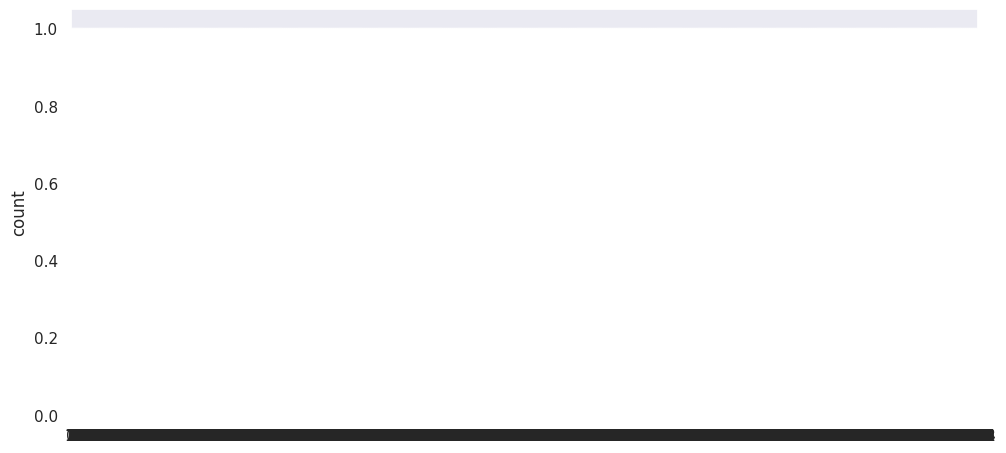

In [ ]:
sns.countplot(y_resampled)
plt.show()

## Split Resampled Data
**Functionality:** Splits the resampled dataset into training and testing sets.

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

## Scale Resampled Data
**Functionality:** Applies StandardScaler to resampled training and test data.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

## Apply PCA to Resampled Data
**Functionality:** Applies PCA with 98% variance retention to resampled and scaled data.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca.fit(X_train1)
pca.n_components_

np.int64(99)

## Transform with PCA
**Functionality:** Transforms resampled data using fitted PCA components.

In [ ]:
X_train1 = pca.transform(X_train1)
X_test1 = pca.transform(X_test1)

## Train KNN with Resampled PCA Data
**Functionality:** Trains KNN classifier on resampled and PCA-transformed data.

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(X_train1, y_train1)
Y_pred = classifier.predict(X_test1)

## Record KNN with PCA Performance
**Functionality:** Calculates KNN accuracy on resampled PCA data and updates results.

In [ ]:
knnp_train_accuracy = accuracy_score(y_train1, classifier.predict(X_train1))
knnp_test_accuracy = accuracy_score(y_test1, Y_pred)

#print(knnp_train_accuracy, knnp_test_accuracy)
result = pd.concat([result, pd.DataFrame([{'Model':'KNN Classifier with PCA','Train Accuracy':knnp_train_accuracy,'Test Accuracy':knnp_test_accuracy}])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.65097,0.648352
1,Logistic Regression,0.939058,0.747253
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernalized SVC,0.847645,0.78022
5,Random Forest Classifier,0.875346,0.758242
0,KNN Classifier with PCA,0.967818,0.943485


## Train Logistic Regression with Resampled PCA Data
**Functionality:** Trains logistic regression with C=10 on resampled and PCA-transformed data.

In [ ]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(C=10, random_state=0)
lgclassifier.fit(X_train1, y_train1)
y_pred_train1 = lgclassifier.predict(X_train1)
y_pred_test1 = lgclassifier.predict(X_test1)

## Record Logistic Regression with PCA Performance
**Functionality:** Calculates logistic regression accuracy on resampled PCA data and updates results.

In [ ]:
lgp_train_accuracy = accuracy_score(y_train1, y_pred_train1)
lgp_test_accuracy = accuracy_score(y_test1, y_pred_test1)
#print(lgp_train_accuracy, knnp_test_accuracy)
result = pd.concat([result, pd.DataFrame([{'Model':'Logistic Regression with PCA','Train Accuracy':lgp_train_accuracy,'Test Accuracy':lgp_test_accuracy}])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.65097,0.648352
1,Logistic Regression,0.939058,0.747253
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernalized SVC,0.847645,0.78022
5,Random Forest Classifier,0.875346,0.758242
0,KNN Classifier with PCA,0.967818,0.943485
0,Logistic Regression with PCA,0.999215,0.968603


## Train Decision Tree with Resampled PCA Data
**Functionality:** Trains decision tree with entropy criterion on resampled and PCA-transformed data.

In [127]:
from sklearn.tree import DecisionTreeClassifier
dtpclassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtpclassifier.fit(X_train1, y_train1)
y_pred_test = dtpclassifier.predict(X_test1)
y_pred_train = dtpclassifier.predict(X_train1)

## Calculate Decision Tree Metrics
**Functionality:** Calculates recall and accuracy scores for decision tree classifier on resampled PCA data.

In [128]:
dtp_train_recall_score = recall_score(y_train1, y_pred_train, average='weighted')
dtp_test_reacll_score = recall_score(y_test1, y_pred_test, average='weighted')
dtp_train_accuracy_score = accuracy_score(y_train1, y_pred_train)
dtp_test_accuracy_score = accuracy_score(y_test1, y_pred_test)

## Record Decision Tree with PCA Performance
**Functionality:** Updates results DataFrame with decision tree accuracy scores on resampled PCA data.

In [129]:
result = pd.concat([result, pd.DataFrame([{'Model':'Decision Tree Classifier with PCA','Train Accuracy':dtp_train_accuracy_score,'Test Accuracy':dtp_test_accuracy_score}])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.65097,0.648352
1,Logistic Regression,0.939058,0.747253
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernalized SVC,0.847645,0.78022
5,Random Forest Classifier,0.875346,0.758242
0,KNN Classifier with PCA,0.967818,0.943485
0,Logistic Regression with PCA,0.999215,0.968603
0,Decision Tree Classifier with PCA,1.0,0.965463


## Train Linear SVM with Resampled PCA Data
**Functionality:** Trains linear SVM classifier with probability estimation on resampled PCA data.

In [132]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0, probability=True)
classifier.fit(X_train1, y_train1)
y_pred = classifier.predict(X_test1)

## Record Linear SVM with PCA Performance
**Functionality:** Calculates linear SVM accuracy scores and updates results DataFrame.

In [133]:
#print("Accuracy Score", accuracy_score(y_test1, y_pred)*100)
lsvcp_train_accuracy = accuracy_score(y_train1, classifier.predict(X_train1))
lsvcp_test_accuracy = accuracy_score(y_test1, y_pred)
result = pd.concat([result, pd.DataFrame([{'Model':'Linear SVC with PCA','Train Accuracy':lsvcp_train_accuracy,'Test Accuracy':lsvcp_test_accuracy}])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.65097,0.648352
1,Logistic Regression,0.939058,0.747253
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernalized SVC,0.847645,0.78022
5,Random Forest Classifier,0.875346,0.758242
0,KNN Classifier with PCA,0.967818,0.943485
0,Logistic Regression with PCA,0.999215,0.968603
0,Decision Tree Classifier with PCA,1.0,0.965463
0,Linear SVC with PCA,0.999608,0.973312


## Train Kernel SVM with Resampled PCA Data
**Functionality:** Trains RBF kernel SVM with C=1 and gamma=0.1 on resampled PCA data.

In [135]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='rbf', C=1, gamma=0.1)
KSVC_clf.fit(X_train1, y_train1)
y_pred_train = KSVC_clf.predict(X_train1)
y_pred_test = KSVC_clf.predict(X_test1)

## Record Kernel SVM with PCA Performance
**Functionality:** Calculates kernelized SVM accuracy scores and updates results DataFrame.

In [136]:
ksvcp_train_accuracy_score = accuracy_score(y_train1, y_pred_train1)
ksvcp_test_accuracy_score = accuracy_score(y_test1, y_pred_test)
result = pd.concat([result, pd.DataFrame([{'Model':'Kernalized SVC with PCA','Train Accuracy':ksvcp_train_accuracy_score,'Test Accuracy':ksvcp_test_accuracy_score}])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.65097,0.648352
1,Logistic Regression,0.939058,0.747253
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernalized SVC,0.847645,0.78022
5,Random Forest Classifier,0.875346,0.758242
0,KNN Classifier with PCA,0.967818,0.943485
0,Logistic Regression with PCA,0.999215,0.968603
0,Decision Tree Classifier with PCA,1.0,0.965463
0,Linear SVC with PCA,0.999608,0.973312


In [137]:
#Random Forest with PCA

## Train Random Forest with Resampled PCA Data
**Functionality:** Trains Random Forest classifier on resampled PCA data.

In [138]:
from sklearn.ensemble import RandomForestClassifier
rfp_clf = RandomForestClassifier()
rfp_clf.fit(X_train1, y_train1)

RandomForestClassifier()

## Calculate Random Forest Metrics
**Functionality:** Calculates Random Forest accuracy scores on training and test data.

In [139]:
y_pred_train1 = rfp_clf.predict(X_train1)
y_pred_test1 = rfp_clf.predict(X_test1)
rfp_train_accuracy_score = accuracy_score(y_train1, y_pred_train1)
rfp_test_accuracy_score = accuracy_score(y_test1, y_pred_test1)

## Record Random Forest with PCA Performance
**Functionality:** Updates results DataFrame with Random Forest accuracy scores.

In [140]:
result = pd.concat([result, pd.DataFrame([{'Model':'Random Forest Classifier with PCA','Train Accuracy':rfp_train_accuracy_score,'Test Accuracy':rfp_test_accuracy_score}])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.65097,0.648352
1,Logistic Regression,0.939058,0.747253
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernalized SVC,0.847645,0.78022
5,Random Forest Classifier,0.875346,0.758242
0,KNN Classifier with PCA,0.967818,0.943485
0,Logistic Regression with PCA,0.999215,0.968603
0,Decision Tree Classifier with PCA,1.0,0.965463
0,Linear SVC with PCA,0.999608,0.973312


## Plot Final Model Comparison
**Functionality:** Creates comprehensive bar chart comparing train and test accuracy of all models.

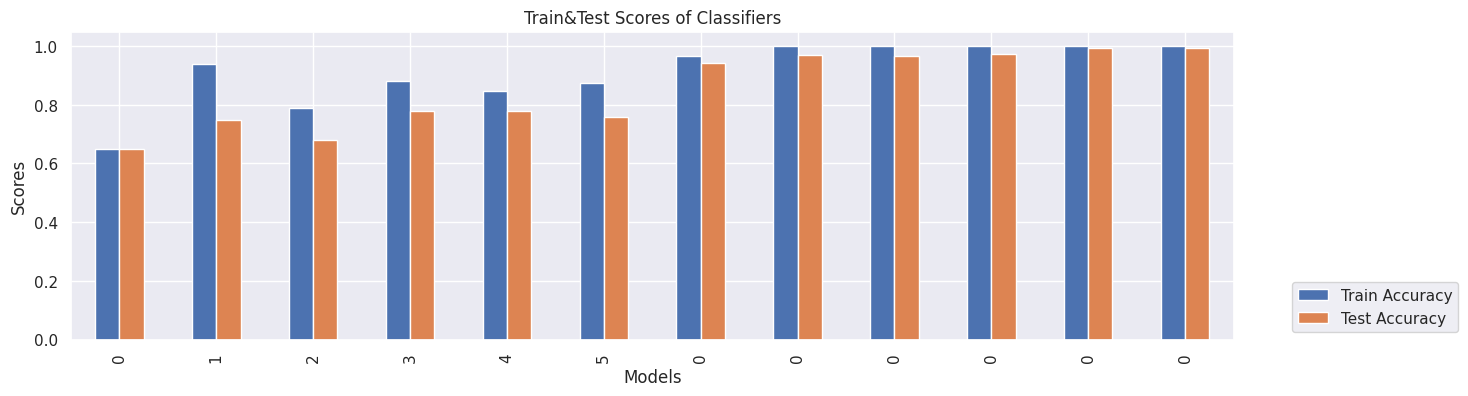

In [142]:
result.plot(kind='bar', figsize=(15,4))
plt.title('Train&Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(loc=4, bbox_to_anchor=(1.2, 0))
plt.show()